### CS 457 - Homework Assignment 9: Classification
### Shahzaib Amir
### Email Address: sa05578@st.habib.edu.pk

In [50]:
import pandas as pd
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

### Part 1
### Classification using CreditCardData.csv

In [51]:
df1 = pd.read_csv('CreditCardData.csv')
df1

,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43,560,+
2,a,24.5,0.500,u,g,q,h,1.50,t,f,0,f,g,280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280,750,-


1. Need to clean the data. Remove all the rows which have any missing values in any
column (missing data is represented as ? and not nan/null so you need to keep this in
mind)

In [52]:
df1.drop(df1[df1['Male'] == '?'].index, inplace = True)
df1.drop(df1[df1['Age'] == '?'].index, inplace = True)
df1.drop(df1[df1['Debt'] == '?'].index, inplace = True)
df1.drop(df1[df1['Married'] == '?'].index, inplace = True)
df1.drop(df1[df1['BankCustomer'] == '?'].index, inplace = True)
df1.drop(df1[df1['EducationLevel'] == '?'].index, inplace = True)
df1.drop(df1[df1['Ethnicity'] == '?'].index, inplace = True)
df1.drop(df1[df1['YearsEmployed'] == '?'].index, inplace = True)
df1.drop(df1[df1['PriorDefault'] == '?'].index, inplace = True)
df1.drop(df1[df1['Employed'] == '?'].index, inplace = True)
df1.drop(df1[df1['CreditScore'] == '?'].index, inplace = True)
df1.drop(df1[df1['DriversLicense'] == '?'].index, inplace = True)
df1.drop(df1[df1['Citizen'] == '?'].index, inplace = True)
df1.drop(df1[df1['ZipCode'] == '?'].index, inplace = True)
df1.drop(df1[df1['Income'] == '?'].index, inplace = True)
df1.drop(df1[df1['Approved'] == '?'].index, inplace = True)


In [53]:
df1

,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43,560,+
2,a,24.5,0.500,u,g,q,h,1.50,t,f,0,f,g,280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280,750,-


2. Replace the Approved column (response variable) values from -/+ to 0/1 or No/Yes
based on your preference.


In [54]:
df1['Approved'] = df1['Approved'].str.replace('+', 'Yes')
df1['Approved'] = df1['Approved'].str.replace('-', 'No')


C:\Users\SHAHZA~1\AppData\Local\Temp/ipykernel_56992/4012148009.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df1['Approved'] = df1['Approved'].str.replace('+', 'Yes')


3. Create a train and test set after cleaning the data. Use 30% (0.3) records for test set.
Use the same train and test set for all your analysis with different classifiers.

4. In your code, set the seed after you read the data. This will keep your data and
calculation consistent throughout the analysis irrespective of multiple runs. See the
example code for the class random_state=99

5. Create a classification model to predict Approved status using Decision Tree.
Interpret the decision tree. Discuss which attributes are important and which are not
important. Include all the analysis steps including Tree Pruning Analysis and compare
the results before and after pruning. 

In [61]:
X = df1.drop(['Approved'],axis=1)
Y = df1['Approved']

In [62]:
dt = tree.DecisionTreeClassifier(random_state=0)


In [63]:
X = pd.get_dummies(X, columns = ['Male','Married','BankCustomer', 'EducationLevel', 'Ethnicity', 'PriorDefault', 'Employed', 'DriversLicense',
'Citizen'])
X


,Age,Debt,YearsEmployed,CreditScore,ZipCode,Income,Male_a,Male_b,Married_l,Married_u,...,Ethnicity_z,PriorDefault_f,PriorDefault_t,Employed_f,Employed_t,DriversLicense_f,DriversLicense_t,Citizen_g,Citizen_p,Citizen_s
0,30.83,0.000,1.25,1,202,0,0,1,0,1,...,0,0,1,0,1,1,0,1,0,0
1,58.67,4.460,3.04,6,43,560,1,0,0,1,...,0,0,1,0,1,1,0,1,0,0
2,24.5,0.500,1.50,0,280,824,1,0,0,1,...,0,0,1,1,0,1,0,1,0,0
3,27.83,1.540,3.75,5,100,3,0,1,0,1,...,0,0,1,0,1,0,1,1,0,0
4,20.17,5.625,1.71,0,120,0,0,1,0,1,...,0,0,1,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,21.08,10.085,1.25,0,260,0,0,1,0,0,...,0,1,0,1,0,1,0,1,0,0
686,22.67,0.750,2.00,2,200,394,1,0,0,1,...,0,1,0,0,1,0,1,1,0,0
687,25.25,13.500,2.00,1,200,1,1,0,0,0,...,0,1,0,0,1,0,1,1,0,0
688,17.92,0.205,0.04,0,280,750,0,1,0,1,...,0,1,0,1,0,1,0,1,0,0


In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=99)

In [65]:
dtmodel = dt.fit(X_train, y_train)

In [66]:
train_pred = dtmodel.predict(X_train)

In [67]:
acc = accuracy_score(train_pred, y_train)
acc*100

100.0

In [68]:
test_pred = dtmodel.predict(X_test)

Before pruning

In [69]:
acc = accuracy_score(test_pred, y_test)
acc*100

84.18367346938776

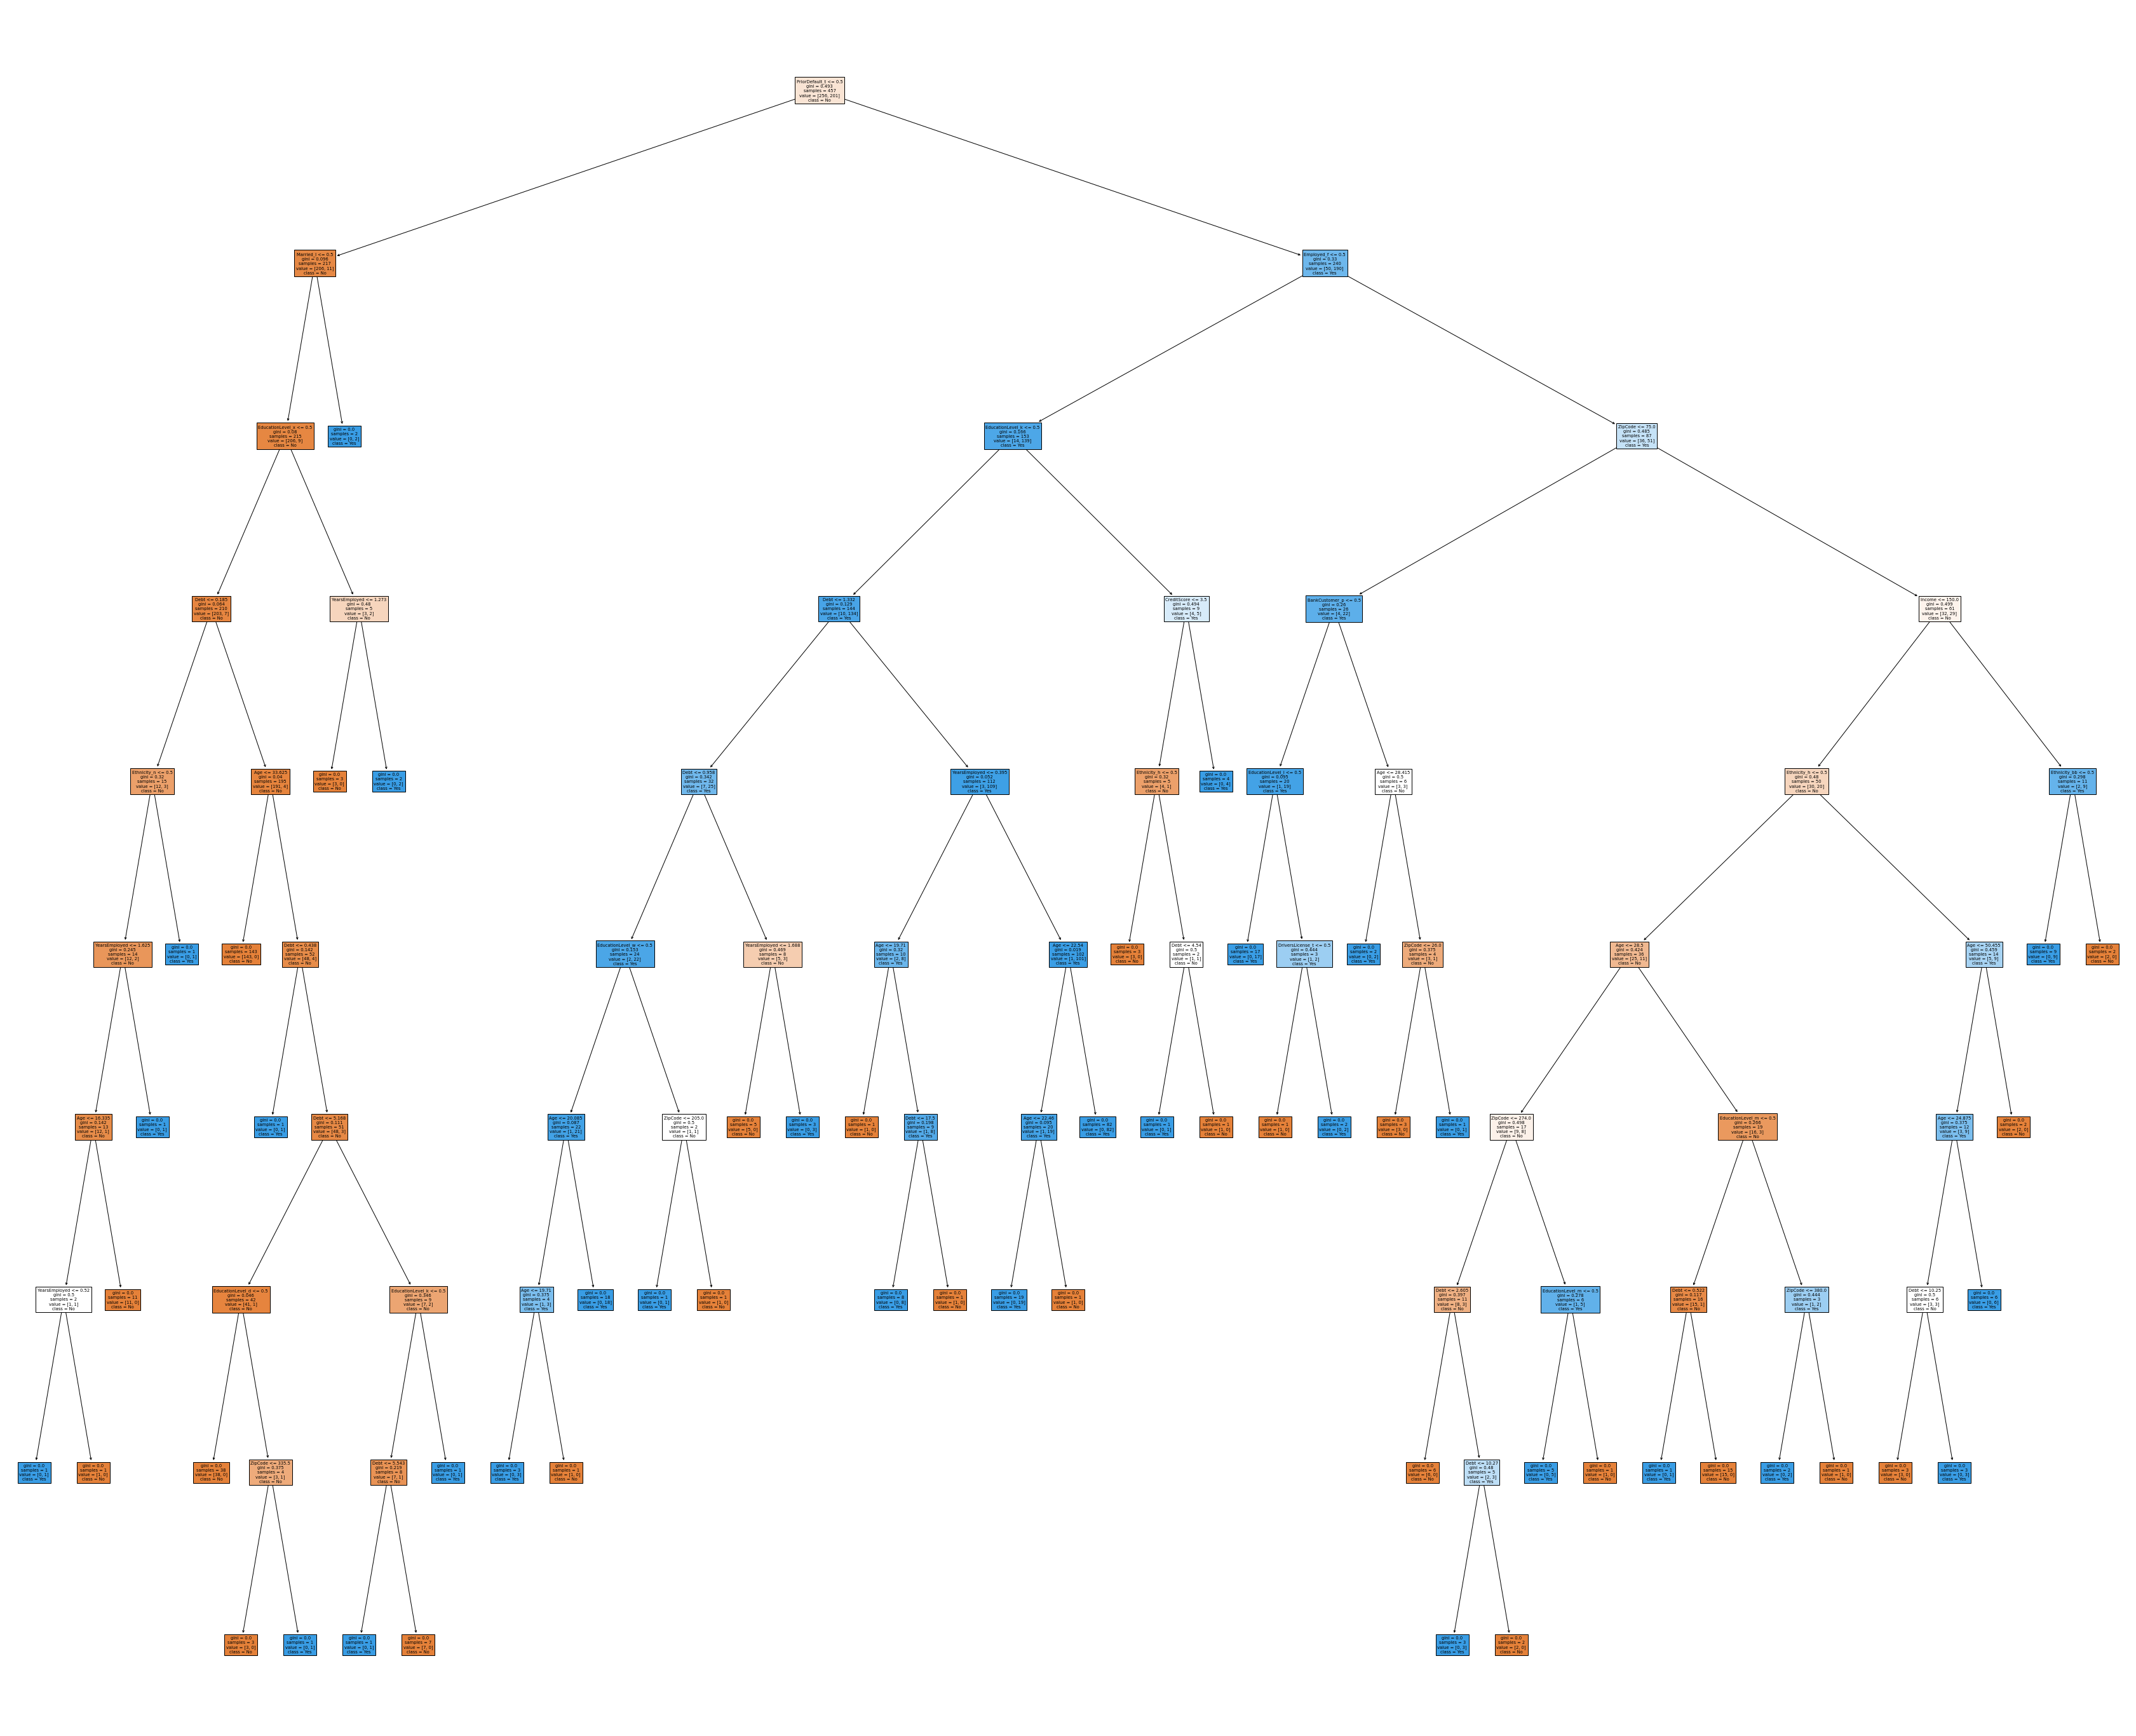

In [71]:
fig = plt.figure(figsize=(60, 50))
_ = tree.plot_tree(dtmodel, 
                   feature_names=list(X.columns),  
                   class_names=Y.value_counts().index,
                   filled=True)

Here the decision tree is costructed showing the values of the columns and the gini index/coefficient which measure the impurity of the data. The gini index value ranges from 0 to 1. Closer to 0 shows, that the impurity or the data distribution across the classes/ciolumns is very low which means the data predicted is predicted well while gini index value close to 1 shows that the data distribution across the classes/columns is very high which means that the data predicted is not on the mark or is very general or vague.

The root node of the tree shows the most important attribute of the dataset.

Columns with low gini value shows that they are the important attributes, for example: Employed, CreditScore, Income, PriorDefault, BankCustomer.

Columns with high gini value shows that theyh are not imporant attributes, for example: Male, Age, Married, Ethnicity, EducationLevel, ZipCode etc.

In [72]:
dt = tree.DecisionTreeClassifier(criterion='gini',random_state=99)

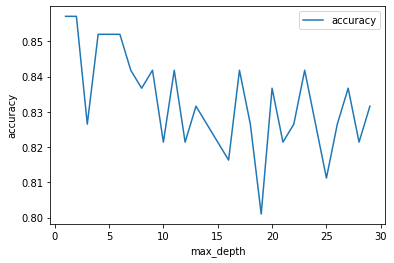

In [73]:
max_depth = []
acc = []
for i in range(1,30):
    dtree = tree.DecisionTreeClassifier(criterion='gini',max_depth=i)
    dtree.fit(X_train, y_train)
    pred = dtree.predict(X_test)
    acc.append(accuracy_score(y_test, pred))
    max_depth.append(i)
    
d = pd.DataFrame({'accuracy':pd.Series(acc),'max_depth':pd.Series(max_depth)})
# visualizing changes in parameters
plt.plot('max_depth','accuracy', data=d)
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()

It shows that the while going in the depth of the tree the accuracy of the predicted data gets decreased very gradually. The accuracy is the greatest when the it is on the root node of the tree which is obvious since we are string from the root node and has not yet arrved on any conclusion, which means that no leaf node is reached yet.

After Pruning

In [74]:
dt = tree.DecisionTreeClassifier(criterion='gini',max_depth=6)

In [75]:
dtmodel = dt.fit(X_train, y_train)
train_pred = dtmodel.predict(X_train)
acc = accuracy_score(train_pred, y_train)
acc*100

95.18599562363238

In [76]:
test_pred = dtmodel.predict(X_test)
acc = accuracy_score(test_pred, y_test)
acc*100

84.6938775510204

Before Pruning, our accuracy was 84.1% but after pruning it increased our accuracy of prediction up to 84.7%. Therefore, we can deduce that pruning can help us increase our accuracy for the prediction.

In [79]:
cm2 = confusion_matrix(y_test,test_pred)

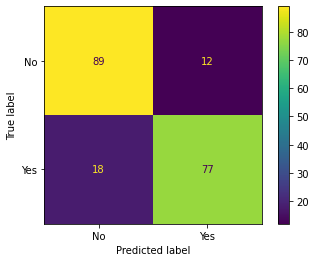

In [80]:
cp = ConfusionMatrixDisplay(cm2,display_labels=dtmodel.classes_)
cp.plot()

We can see above in the confusion matrix that the number of correct predictions are quite high(77).

6. Create a classification model to predict Approved status using RandomForest.
Include all the analysis steps including variable importance plot. Try atleast 5
different values of n_estimators (number of trees) and compare the classification
error. Pick the best model (based on n_estimators) for your final comparison.


In [83]:
rf1 = RandomForestClassifier(n_estimators=100)
rf2 = RandomForestClassifier(n_estimators=200)
rf3 = RandomForestClassifier(n_estimators=300)
rf4 = RandomForestClassifier(n_estimators=400)
rf5 = RandomForestClassifier(n_estimators=500)

In [85]:
rfmodel1 = rf1.fit(X_train, y_train)
train_pred = rfmodel1.predict(X_train)
acc = accuracy_score(train_pred, y_train)
acc*100

100.0

In [86]:
rfmodel2 = rf2.fit(X_train, y_train)
train_pred = rfmodel2.predict(X_train)
acc = accuracy_score(train_pred, y_train)
acc*100

100.0

In [87]:
rfmodel3 = rf3.fit(X_train, y_train)
train_pred = rfmodel3.predict(X_train)
acc = accuracy_score(train_pred, y_train)
acc*100

100.0

In [88]:
rfmodel4 = rf4.fit(X_train, y_train)
train_pred = rfmodel4.predict(X_train)
acc = accuracy_score(train_pred, y_train)
acc*100

100.0

In [89]:
rfmodel5 = rf5.fit(X_train, y_train)
train_pred = rfmodel5.predict(X_train)
acc = accuracy_score(train_pred, y_train)
acc*100

100.0

In [90]:
test_pred1 = rfmodel1.predict(X_test)
acc = accuracy_score(test_pred1, y_test)
acc*100

86.73469387755102

In [91]:
test_pred2 = rfmodel2.predict(X_test)
acc = accuracy_score(test_pred2, y_test)
acc*100

86.22448979591837

In [92]:
test_pred3 = rfmodel3.predict(X_test)
acc = accuracy_score(test_pred3, y_test)
acc*100

86.22448979591837

In [93]:
test_pred4 = rfmodel4.predict(X_test)
acc = accuracy_score(test_pred4, y_test)
acc*100

86.22448979591837

In [94]:
test_pred5 = rfmodel5.predict(X_test)
acc = accuracy_score(test_pred5, y_test)
acc*100

87.24489795918367

Variable Importance Plot

<BarContainer object of 46 artists>

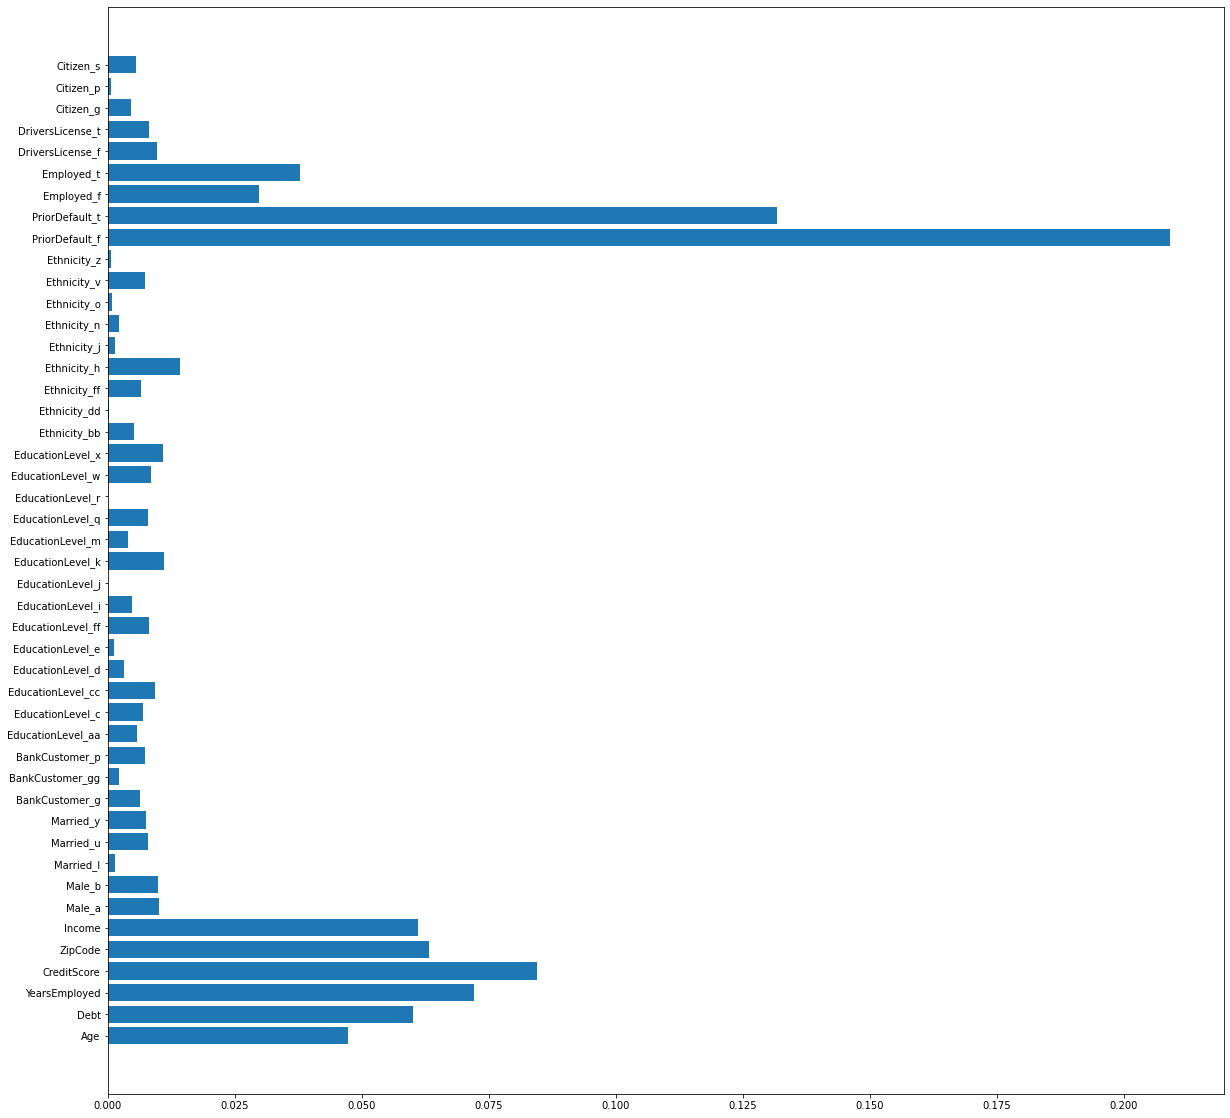

In [109]:
fig = plt.figure(figsize=(20,20))
plt.barh(list(X.columns), rf5.feature_importances_)

Sorting the importance in ascending order

Text(0.5, 0, 'Random Forest Feature Importance')

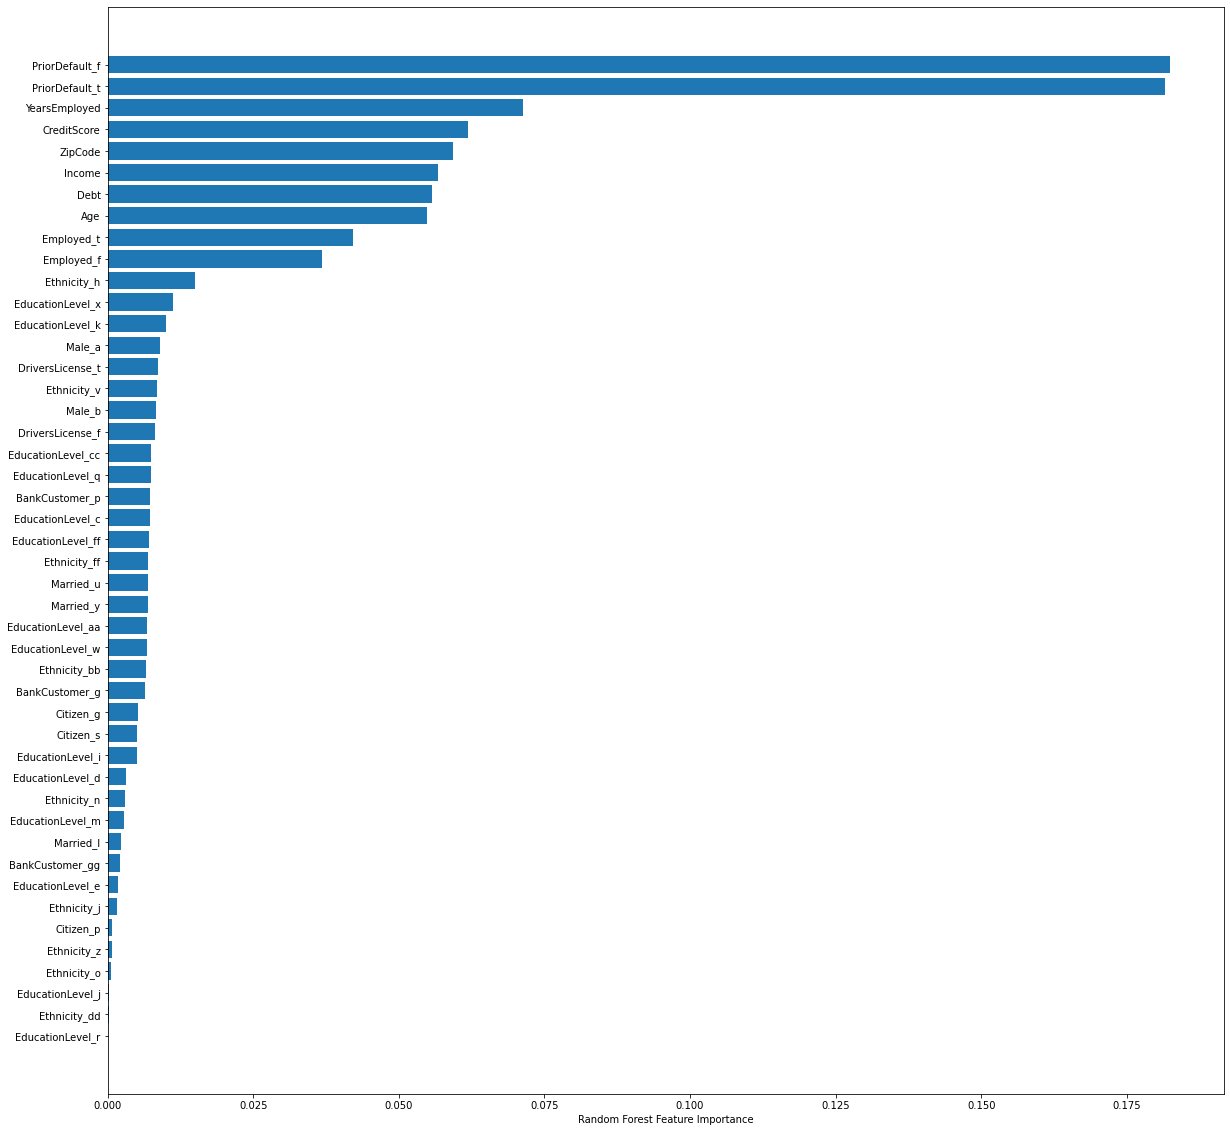

In [111]:
sorted_idx = rfmodel5.feature_importances_.argsort()
fig = plt.figure(figsize=(20,20))
plt.barh(list(X.columns[sorted_idx]), rfmodel5.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

7. Report the comparison between Decision Tree and RandomForest in terms of
classification performance.


Choosing rfmodel5 with n_estimators = 500 as it gives the greater accuracy percentage than the other 4 model that I used. In addition to this, we can also see that Random Forest(87.2%) gives better prediction on the test data than Decision Tree(84.6%).

### Part 2
### Recommendation using mcdonalds.csv

In [128]:
df2 = pd.read_csv('mcdonalds.csv')
df2

,restaurant,item,calories,cal_fat,total_fat,sat_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium
0,Mcdonalds,Artisan Grilled Chicken Sandwich,380,60,7,2.0,95,1110,44,3,11,37,4,20,20
1,Mcdonalds,Grilled Bacon Smokehouse Chicken Sandwich,750,280,31,10.0,155,1940,62,2,18,55,6,25,20
2,Mcdonalds,Crispy Bacon Smokehouse Chicken Sandwich,920,410,45,12.0,120,1980,81,4,18,46,6,20,20
3,Mcdonalds,Big Mac,540,250,28,10.0,80,950,46,3,9,25,10,2,15
4,Mcdonalds,Cheeseburger,300,100,12,5.0,40,680,33,2,7,15,10,2,10
5,Mcdonalds,Classic Chicken Sandwich,510,210,24,4.0,65,1040,49,3,6,25,0,4,2
6,Mcdonalds,Filet-O-Fish,380,170,18,4.0,40,640,38,2,5,15,2,0,15
7,Mcdonalds,Hamburger,250,70,8,3.0,30,480,31,2,6,13,2,2,4
8,Mcdonalds,Lobster Roll,290,50,5,1.5,65,630,35,2,3,24,4,6,15
9,Mcdonalds,McChicken,350,130,15,3.5,40,600,40,2,5,15,2,2,4


1. Build a decision tree to recommend similar food based on their attributes. Interpret
your decision tree and tell some interesting insights from it. You do not (necessarily)
need to pick all the food (rows) and attributes (columns). Just pick 3 similar food
items of your choice and explain/interpret your recommendations.

Dropping Restaurant column since we know that the data is for McDonalds Restaurant

In [129]:
del df2['restaurant']

In [130]:
MCDsX = df2.drop(['item'], axis=1)
MCDsY = df2['item']

In [131]:
dt2 = tree.DecisionTreeClassifier(criterion='gini', min_samples_split=2, min_samples_leaf=1,random_state=99)

In [132]:
dtmodel2 = dt2.fit(MCDsX, MCDsY)

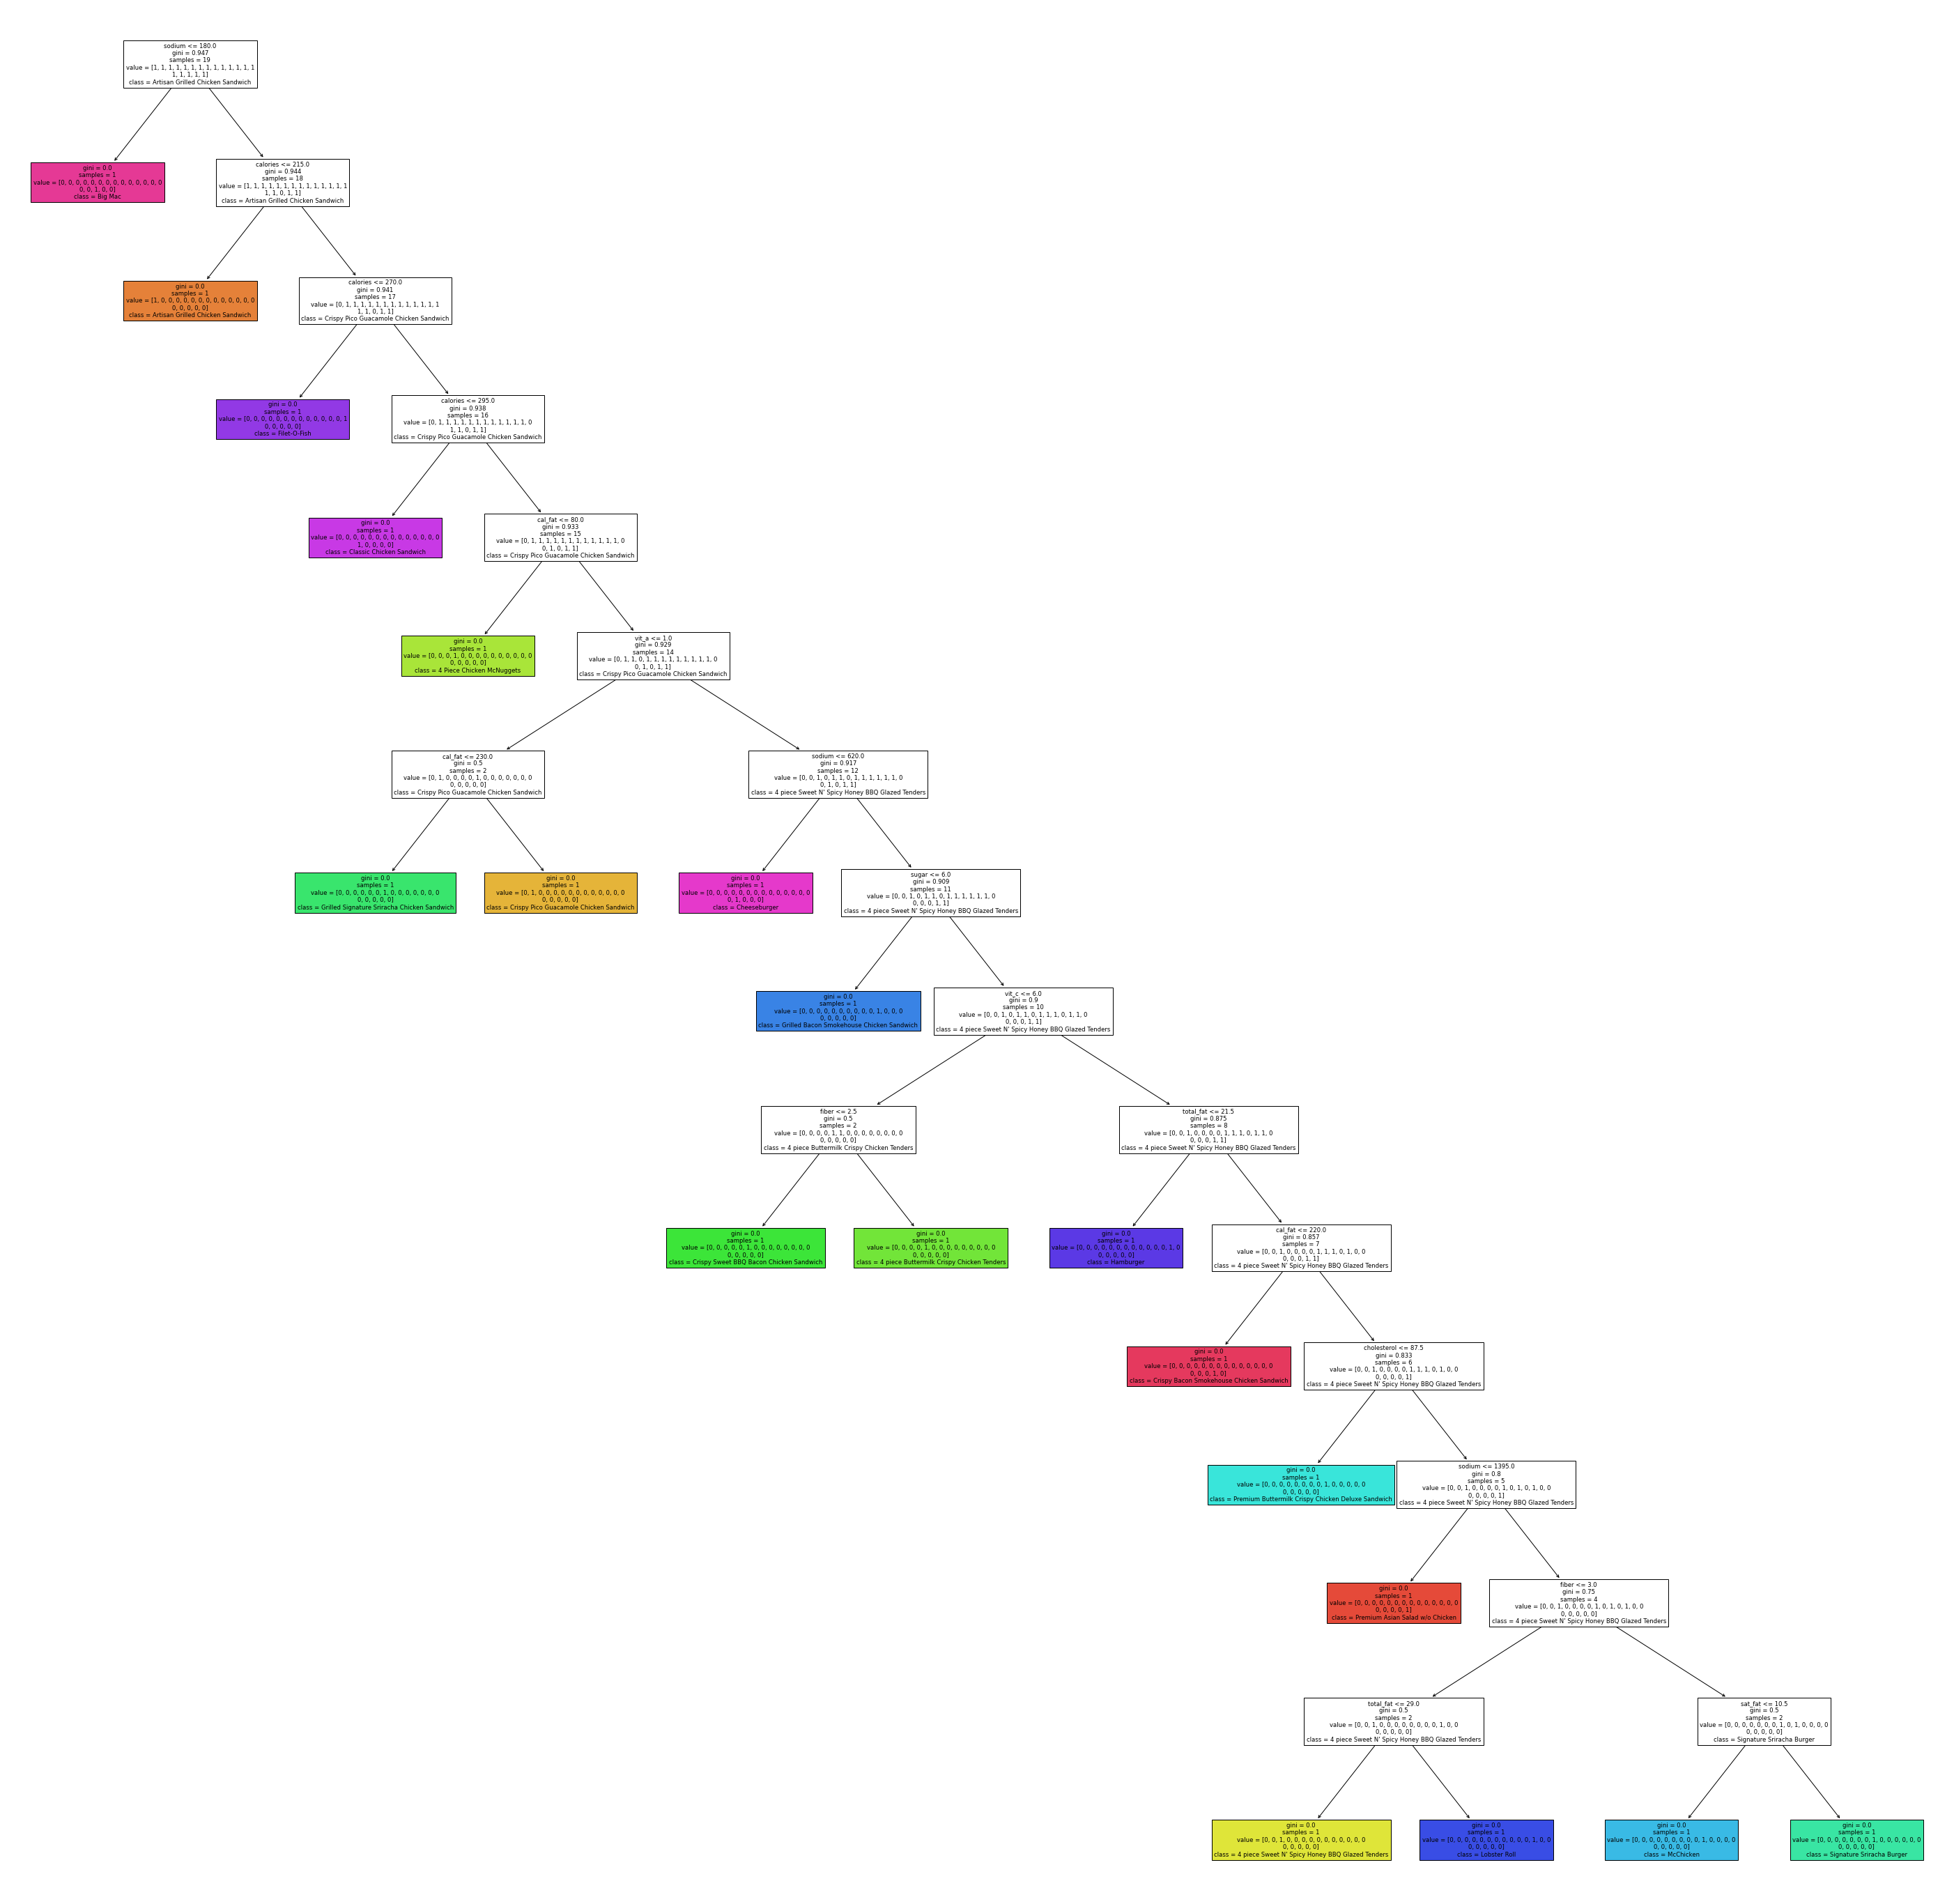

In [134]:
fig = plt.figure(figsize=(50,50))
_ = tree.plot_tree(dtmodel2, 
                   feature_names=list(MCDsX.columns),  
                   class_names=MCDsY.value_counts().index,
                   filled=True)

Using the figure above we can be able to find the 3 most related food items ordered. We can do that by looking at the leaf nodes of the decision tree above, for example three related food items are, Crispy Sweet BBQ Bacon Chicken Sandwich and Buttermilk Crispy Chicken Tenders, McChicken and Signature Sriracha Burger and Sweet N' Spicy Honey BBQ Glazed Tenders and Losbter Roll
are the two most related food items as their gini index is 0 (distance between the two nodes is less).